#### UNIVERSIDADE FEDERAL DO PIAUÍ
#### CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA
#### CURSO SUPERIOR DE TECNOLOGIA EM GESTÃO DE DADOS
Alunos: Enzo de Sousa Oliveira, Franciel Moreira de França, João Pedro Lopes Pacheco
***

Importando as biblioteca necessárias:

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

Checando como os dados estão organizados:

In [2]:
dados = pd.read_csv('./fipe_2022.csv')
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


Renomeando tabelas para facilitar visualização:

In [3]:
dados.rename(columns={'year_of_reference' : 'Ano_de_referência' , 'month_of_reference' : 'Mês_de_referencia' , 'fipe code' : "Código_fipe", 'authentication':'Autenticação', 'brand':'Marca','model':'Modelo', 'fuel':'Combustível', 'gear':'Câmbio', 'engine_size':'Tipo_de_motor', 'year_model':'Ano_do_Modelo', 'avg_price_brl':'Preço', 'age_years':'Tempo_em_anos'},inplace=True)
dados.head()

,Ano_de_referência,Mês_de_referencia,fipe_code,Autenticação,Marca,Modelo,Combustível,Câmbio,Tipo_de_motor,Ano_do_Modelo,Preço,Tempo_em_anos
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


Análisando a relação entre Combustível, Tipo de Motor e Arrecadação:

In [4]:
#Agrupando por marca:
PorCombustivel = dados.loc[0:,['Preço','Combustível','Tipo_de_motor']].rename(columns={'Preço':'Arrecadação'}).groupby(['Combustível','Tipo_de_motor'])
#Fazendo o somatório:
Arrecadacao = PorCombustivel.agg({'Arrecadação':'sum'}).sort_values('Combustível')
Arrecadacao.head()

Arrecadação
Combustível Tipo_de_motor             
Alcohol     1.0              8548641.0
            1.3               263848.0
            1.5              7495672.0
            1.6             12630374.0
            1.8             14471420.0

Plotando gráfico com a relação acima:

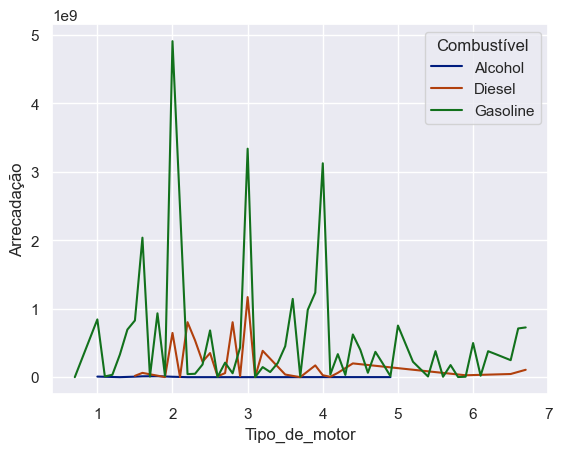

In [5]:
sns.lineplot(x='Tipo_de_motor',y='Arrecadação',hue='Combustível',data=Arrecadacao, palette='dark')
Motores = dados.groupby('Tipo_de_motor')

Contando a quantidade média de vendas por marcas dos motores 2.0, 3.0 e 4.0:

In [6]:
PorMarca = dados.loc[0:,['Marca','Tipo_de_motor','Preço']].rename(columns={'Preço':'Quantidade de vendas'})
lista = [2.0,3.0,4.0]
PorMarca = PorMarca[PorMarca['Tipo_de_motor'].isin(lista)]
QuantiaPorMarca = PorMarca.groupby(['Marca','Tipo_de_motor'])
QuantiaPorMarca = QuantiaPorMarca.count().sort_values('Quantidade de vendas')
QuantiaPorMarca.mean()

Quantidade de vendas    890.702381
dtype: float64

Filtrando as marcas que possuem vendas desses motores acima da média:

In [7]:
QuantiaPorMarca = QuantiaPorMarca[QuantiaPorMarca['Quantidade de vendas']>890.70]
QuantiaPorMarca.sort_values('Quantidade de vendas')

,,Quantidade de vendas
Marca,Tipo_de_motor,
Jaguar,3.0,904
Toyota,2.0,910
Suzuki,2.0,936
Mitsubishi,3.0,1122
Jeep,2.0,1154
Mercedes-Benz,3.0,1331
Fiat,2.0,1342
Ford,3.0,1344
Kia Motors,2.0,1364


Plotando o gráfico da análise acima:

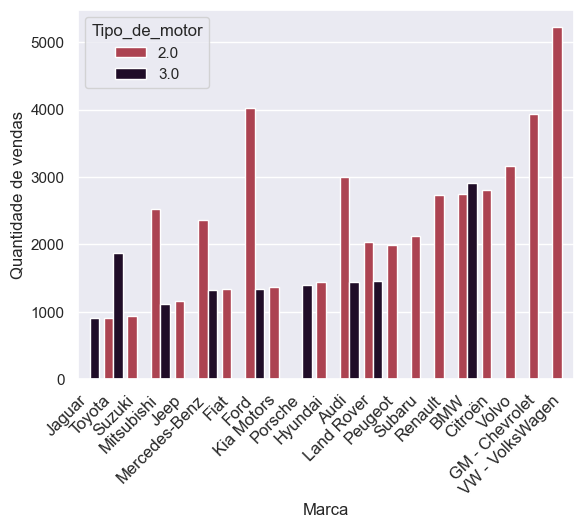

In [8]:
grafico = sns.barplot(data=QuantiaPorMarca, x='Marca',y='Quantidade de vendas', hue='Tipo_de_motor',palette=['#BE3144','#22092C'])
for label in grafico.get_xticklabels():
   label.set_fontsize(12)
   label.set_rotation(45)
   label.set_horizontalalignment('right')

Analisando a relação entre vendas e mês de referência:

In [9]:
PorMes = dados.loc[:,['Mês_de_referencia','Preço']]
PorMes = PorMes.groupby('Mês_de_referencia', as_index=False)
PorMes = PorMes.sum().sort_values('Preço')
PorMes

,Mês_de_referencia,Preço
4,January,2.790822e+09
3,February,2.842771e+09
7,March,2.892666e+09
0,April,2.904831e+09
8,May,2.932976e+09
6,June,2.967624e+09
5,July,2.972965e+09
1,August,2.977614e+09
10,October,3.017314e+09
11,September,3.027174e+09


Plotando gráfico da relação acima:

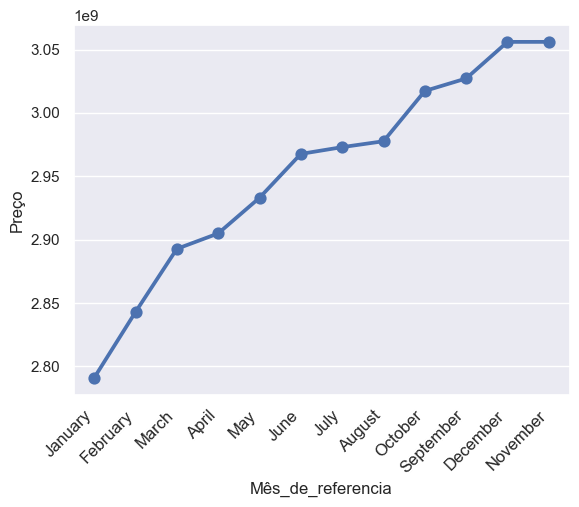

In [10]:
g = sns.pointplot(data=PorMes, x='Mês_de_referencia', y='Preço')
for label in g.get_xticklabels():
   label.set_rotation(45)
   label.set_fontsize(12)
   label.set_horizontalalignment('right')

Analisando a relação entre o preço e o tipo de motor:

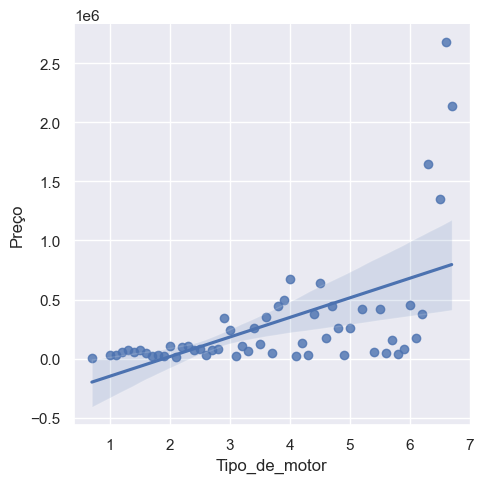

In [11]:
motor_valor = dados.loc[0:,["Tipo_de_motor", "Preço"]].groupby("Tipo_de_motor", as_index=False)
motor_valor_media = motor_valor.mean().sort_values("Tipo_de_motor")
sns.lmplot(data=motor_valor_media,x='Tipo_de_motor',y='Preço')

Analisando a relação entre a quantidade de vendas e o ano do carro:

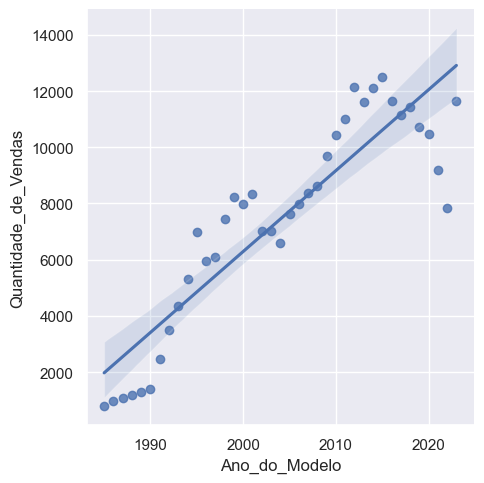

In [12]:
Ano_Modelo=dados.loc[:,['Ano_do_Modelo','Preço']]
Ano_Modelo=Ano_Modelo.rename(columns={'Preço':'Quantidade_de_Vendas'}).groupby('Ano_do_Modelo', as_index=False)
Ano_Modelo_count=Ano_Modelo.count()
sns.lmplot(data=Ano_Modelo_count,x='Ano_do_Modelo',y='Quantidade_de_Vendas')

Analisando a relação entre a arrecadação e o ano do carro:

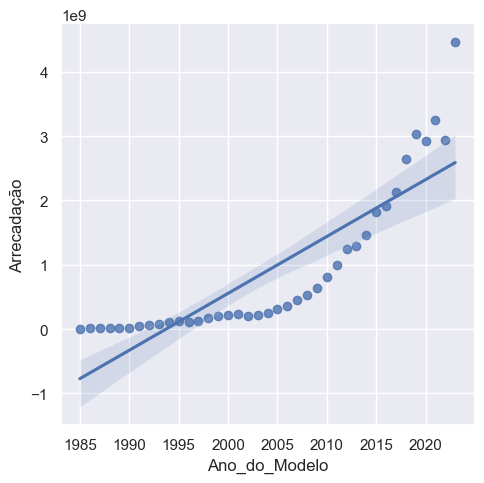

In [13]:
Ano_Modelo_sum=Ano_Modelo.sum().rename(columns={'Quantidade_de_Vendas':'Arrecadação'})
sns.lmplot(data=Ano_Modelo_sum,x='Ano_do_Modelo',y='Arrecadação')

Modelos de luxo:

In [150]:
Luxo = dados.loc[:,['Modelo','Preço']]
Luxo = Luxo.groupby('Modelo')
Luxo = Luxo.mean()
Luxo.mean()
148230.959065 * 4

592923.83626

In [153]:
Luxo = dados.loc[:,['Modelo','Preço','Marca']]
Luxo = Luxo[Luxo['Preço']>592923.83626]
LuxoVendas = Luxo.rename(columns={'Preço':'Quantidade de vendas'}).groupby(['Marca','Modelo']).count()
LuxoArrecadacao = Luxo.rename(columns={'Preço':'Arrecadação'}).groupby(['Marca','Modelo']).sum()

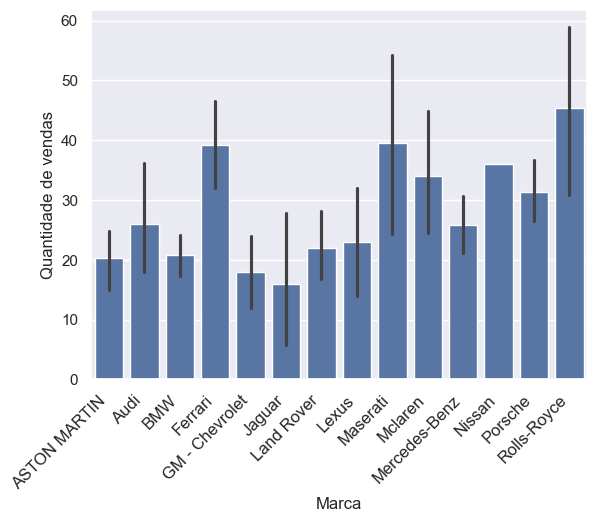

In [85]:
g = sns.barplot(data=LuxoVendas, x='Marca',y='Quantidade de vendas')
for label in g.get_xticklabels():
   label.set_rotation(45)
   label.set_fontsize(12)
   label.set_horizontalalignment('right')

Modelos mais vendidos das marcas com maior arrecadação:

In [156]:
LuxoMaisVendidos = dados.loc[:,['Modelo','Preço','Marca']]
lista = ['Ferrari','Mclaren','Rolls-Royce']
LuxoMaisVendidos = LuxoMaisVendidos[LuxoMaisVendidos['Marca'].isin(lista)]
LuxoMaisVendidos = LuxoMaisVendidos.groupby(['Marca','Modelo'],as_index=False).agg({'Preço':'count'}).rename(columns={'Preço':'Quantidade de vendas'})
LuxoMaisVendidos.agg({'Quantidade de vendas':'mean'})

Quantidade de vendas    37.926829
dtype: float64

Acima da média:

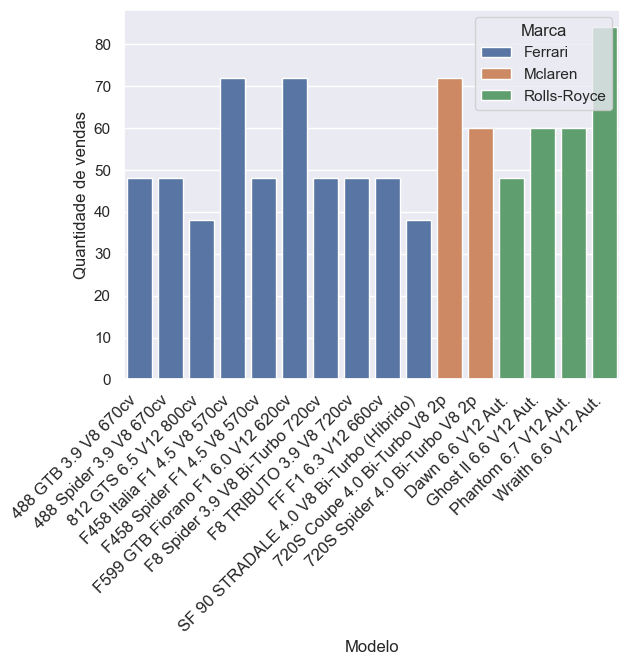

In [161]:
LuxoMaisVendidos = LuxoMaisVendidos[LuxoMaisVendidos['Quantidade de vendas']>37]
g = sns.barplot(data=LuxoMaisVendidos, x='Modelo',y='Quantidade de vendas',hue='Marca')
for label in g.get_xticklabels():
   label.set_rotation(45)
   label.set_fontsize(12)
   label.set_horizontalalignment('right')